# Imports 

In [1]:
!pip install --upgrade scikit-learn imbalanced-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 73.9 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
category-encoders 2.7.0 requires scikit-learn<1.6.0,>=1.0.0, but you have scikit-learn 1.6.1 which is incompatible.
cesium 0.12.4 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatible.


In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium import plugins

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, recall_score, precision_score, f1_score, precision_recall_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier, BaggingClassifier, ExtraTreesClassifier, AdaBoostClassifier
from xgboost import XGBClassifier 
from catboost import CatBoostClassifier    
from lightgbm import LGBMClassifier
from sklearn.cluster import KMeans
from imblearn.over_sampling import SMOTE

import tensorflow as tf
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

2025-06-26 06:16:56.434675: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750918616.746024      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750918616.836162      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# Read Data

In [3]:
df = pd.read_excel('/kaggle/input/telco-customer-churn/Telco_customer_churn.xlsx')
df.head().T

,0,1,2,3,4
CustomerID,3668-QPYBK,9237-HQITU,9305-CDSKC,7892-POOKP,0280-XJGEX
Count,1,1,1,1,1
Country,United States,United States,United States,United States,United States
State,California,California,California,California,California
City,Los Angeles,Los Angeles,Los Angeles,Los Angeles,Los Angeles
Zip Code,90003,90005,90006,90010,90015
Lat Long,"33.964131, -118.272783","34.059281, -118.30742","34.048013, -118.293953","34.062125, -118.315709","34.039224, -118.266293"
Latitude,33.964131,34.059281,34.048013,34.062125,34.039224
Longitude,-118.272783,-118.30742,-118.293953,-118.315709,-118.266293
Gender,Male,Female,Female,Female,Male


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [5]:
df.describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,0.265370,58.699418,4400.295755
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,0.441561,21.525131,1183.057152
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,0.000000,40.000000,3469.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,0.000000,61.000000,4527.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,1.000000,75.000000,5380.500000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,1.000000,100.000000,6500.000000


In [6]:
df.isnull().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
sum_of_unique_value = df.nunique()
constant_column = sum_of_unique_value[sum_of_unique_value == 1].index.tolist()

print("Columns that have only one value :")
print(constant_column)

Columns that have only one value :
['Count', 'Country', 'State']


# Data Cleaning

In [9]:
df.drop(columns=['CustomerID','Count','Churn Label','Country','State'],inplace=True)

In [10]:
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')
df['Total Charges'] = df['Total Charges'].fillna(0)

In [11]:
df.head().T

,0,1,2,3,4
City,Los Angeles,Los Angeles,Los Angeles,Los Angeles,Los Angeles
Zip Code,90003,90005,90006,90010,90015
Lat Long,"33.964131, -118.272783","34.059281, -118.30742","34.048013, -118.293953","34.062125, -118.315709","34.039224, -118.266293"
Latitude,33.964131,34.059281,34.048013,34.062125,34.039224
Longitude,-118.272783,-118.30742,-118.293953,-118.315709,-118.266293
Gender,Male,Female,Female,Female,Male
Senior Citizen,No,No,No,No,No
Partner,No,No,No,Yes,No
Dependents,No,Yes,Yes,Yes,Yes
Tenure Months,2,2,8,28,49


# Exploratory Data Analysis - EDA

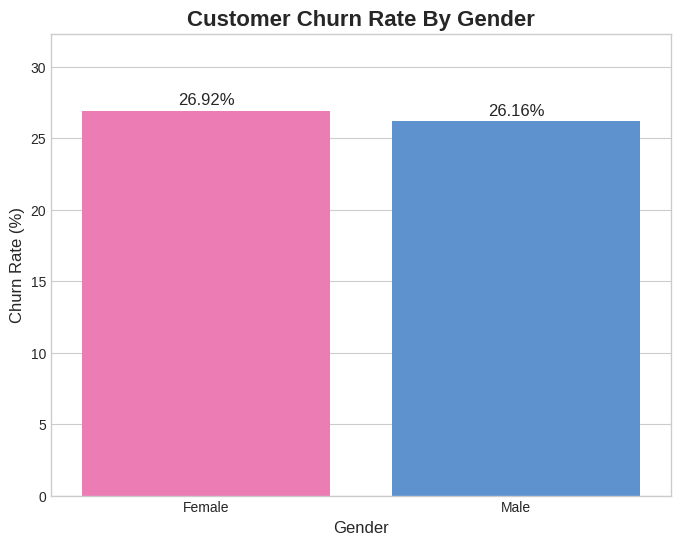

In [12]:
churn_by_gender = df.groupby('Gender')['Churn Value'].value_counts(normalize=True).unstack()
churn_rate = churn_by_gender[1] * 100

plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(8, 6))

bars = sns.barplot(x=churn_rate.index, y=churn_rate.values, palette=['#FF69B4', '#4A90E2'], ax=ax)

for bar in bars.patches:
    ax.annotate(f'{bar.get_height():.2f}%',
                    (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                    ha='center', va='center',
                    size=12, xytext=(0, 8),
                    textcoords='offset points')

ax.set_title('Customer Churn Rate By Gender', fontsize=16, fontweight='bold')
ax.set_xlabel('Gender', fontsize=12)
ax.set_ylabel('Churn Rate (%)', fontsize=12)
ax.set_ylim(0, churn_rate.max() * 1.2)

plt.show()

Rate of Males and Females nearly equal

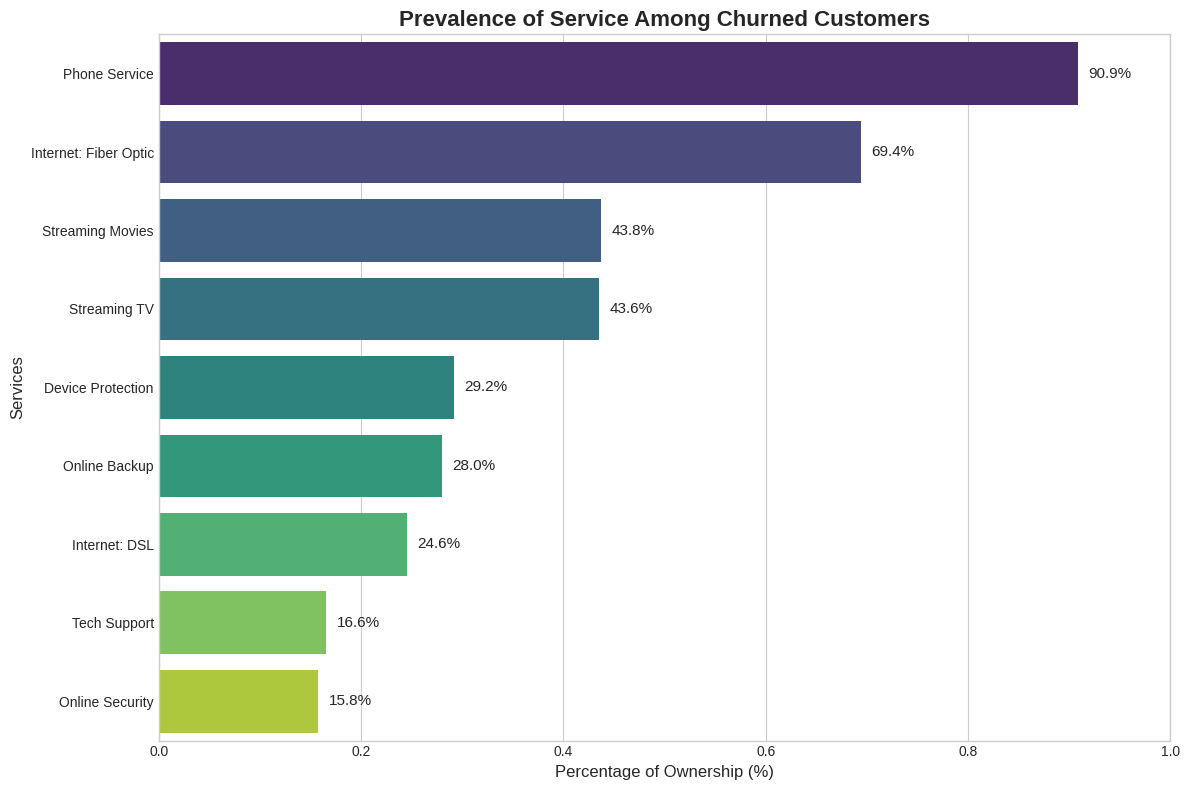

In [13]:
df_churn = df[df['Churn Value'] == 1].copy()

service_prevalence = {}

service_prevalence['Phone Service'] = (df_churn['Phone Service'] == 'Yes').mean()
service_prevalence['Internet: Fiber Optic'] = (df_churn['Internet Service'] == 'Fiber optic').mean()
service_prevalence['Internet: DSL'] = (df_churn['Internet Service'] == 'DSL').mean()
service_prevalence['Streaming TV'] = (df_churn['Streaming TV'] == 'Yes').mean()
service_prevalence['Streaming Movies'] = (df_churn['Streaming Movies'] == 'Yes').mean()
service_prevalence['Device Protection'] = (df_churn['Device Protection'] == 'Yes').mean()
service_prevalence['Online Backup'] = (df_churn['Online Backup'] == 'Yes').mean()
service_prevalence['Tech Support'] = (df_churn['Tech Support'] == 'Yes').mean()
service_prevalence['Online Security'] = (df_churn['Online Security'] == 'Yes').mean()


service_df = pd.DataFrame(list(service_prevalence.items()), columns=['Service', 'Prevalence'])
service_df = service_df.sort_values(by='Prevalence', ascending=False)

plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Prevalence', y='Service', data=service_df, palette='viridis')

for p in ax.patches:
    width = p.get_width()
    ax.text(width + 0.01,
            p.get_y() + p.get_height() / 2,
            f'{width:.1%}',
            va='center',
            fontsize=11)

plt.title('Prevalence of Service Among Churned Customers', fontsize=16, fontweight='bold')
plt.xlabel('Percentage of Ownership (%)', fontsize=12)
plt.ylabel('Services', fontsize=12)
plt.xlim(0, 1)
plt.tight_layout()

plt.show()

The majority of users who churn are telephone service customers.

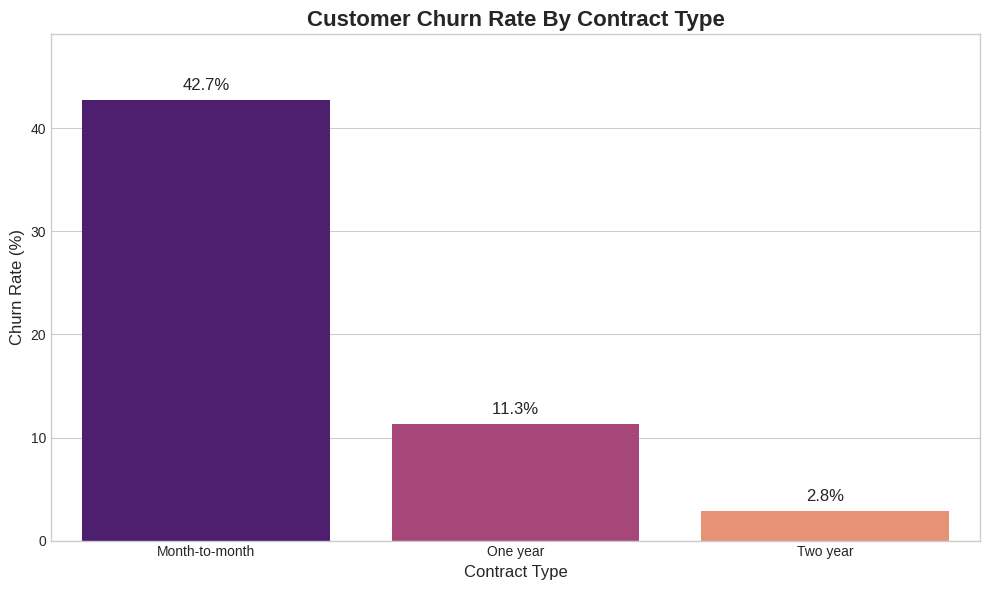

In [14]:
churn_by_contract = df.groupby('Contract')['Churn Value'].mean() * 100
    
churn_by_contract = churn_by_contract.sort_values(ascending=False).reset_index()
churn_by_contract.rename(columns={'Churn Value': 'Churn Rate (%)'}, inplace=True)

plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Contract', y='Churn Rate (%)', data=churn_by_contract, palette='magma')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 1,
            f'{height:.1f}%',
            ha="center",
            fontsize=12)

ax.set_title('Customer Churn Rate By Contract Type', fontsize=16, fontweight='bold')
ax.set_xlabel('Contract Type', fontsize=12)
ax.set_ylabel('Churn Rate (%)', fontsize=12)
ax.set_ylim(0, churn_by_contract['Churn Rate (%)'].max() * 1.15)

plt.tight_layout()
plt.show()

Customers on Monthly contracts are significantly more prone to churn.

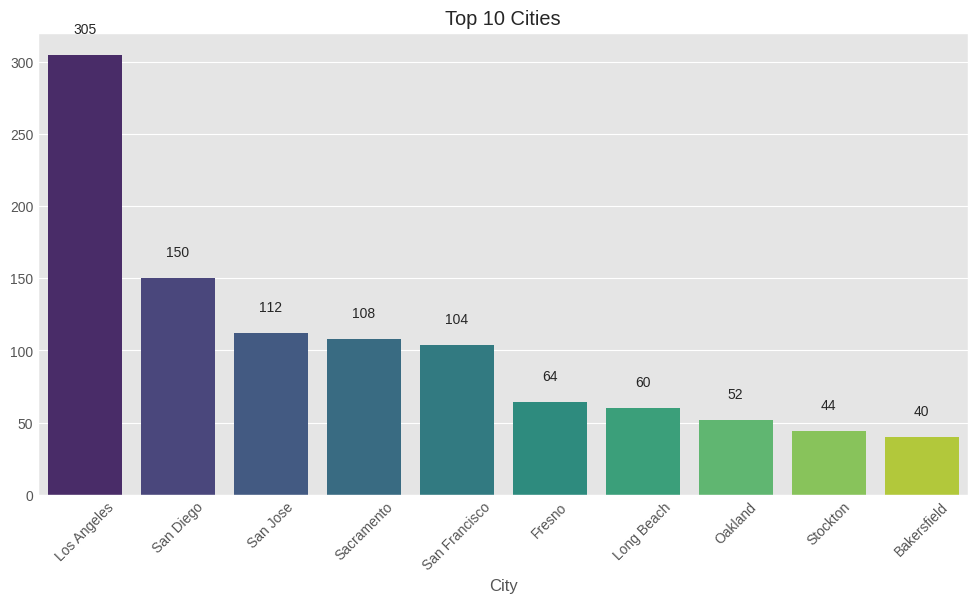

In [15]:
top_10_Cities = df.City.value_counts().head(10)

plt.figure(figsize=(12,6))
plt.style.use('ggplot')
sns.barplot(x=top_10_Cities.index, y=top_10_Cities.values, palette='viridis')  
plt.title('Top 10 Cities')
plt.xlabel('City')
for i, count in enumerate(top_10_Cities.values):
    plt.text(i, count + 15, str(count), ha='center')  
plt.xticks(rotation=45)  
plt.show()

The majority of customer churn comes from Los Angeles.

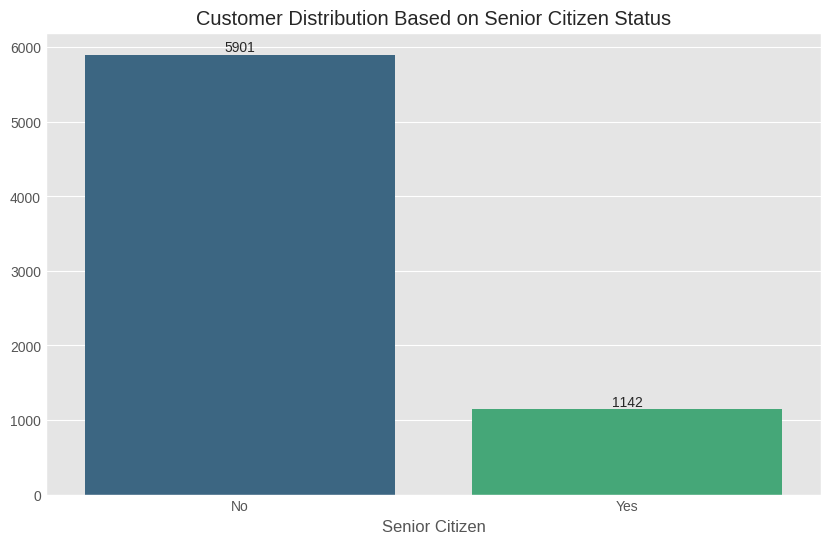

In [16]:
counts = df['Senior Citizen'].value_counts()

plt.figure(figsize=(10,6))
plt.style.use('seaborn-v0_8-pastel')
ax = sns.barplot(x=counts.index, y=counts.values, palette='viridis')
for i in range(len(counts)):
    plt.text(i, counts.values[i] + 0.5, str(counts.values[i]), ha='center', va='bottom')

plt.xlabel('Senior Citizen')
plt.title('Customer Distribution Based on Senior Citizen Status')
plt.show()

The majority of customers are not senior citizens.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


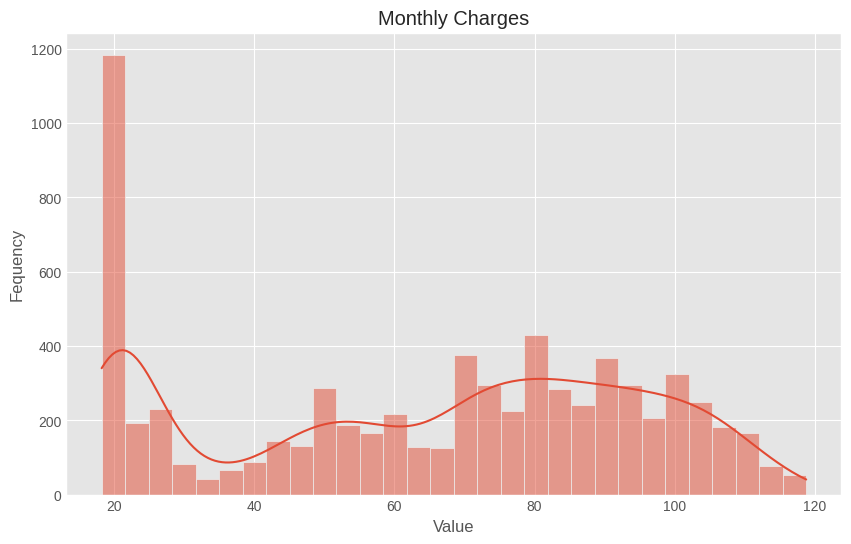

In [17]:
plt.figure(figsize=(10, 6))
plt.style.use('ggplot')
sns.histplot(
    df['Monthly Charges'], 
    bins=30, 
    kde=True,
)
plt.title('Monthly Charges')
plt.xlabel('Value')
plt.ylabel('Fequency')
plt.show()

Most customers only pay relatively low bills.

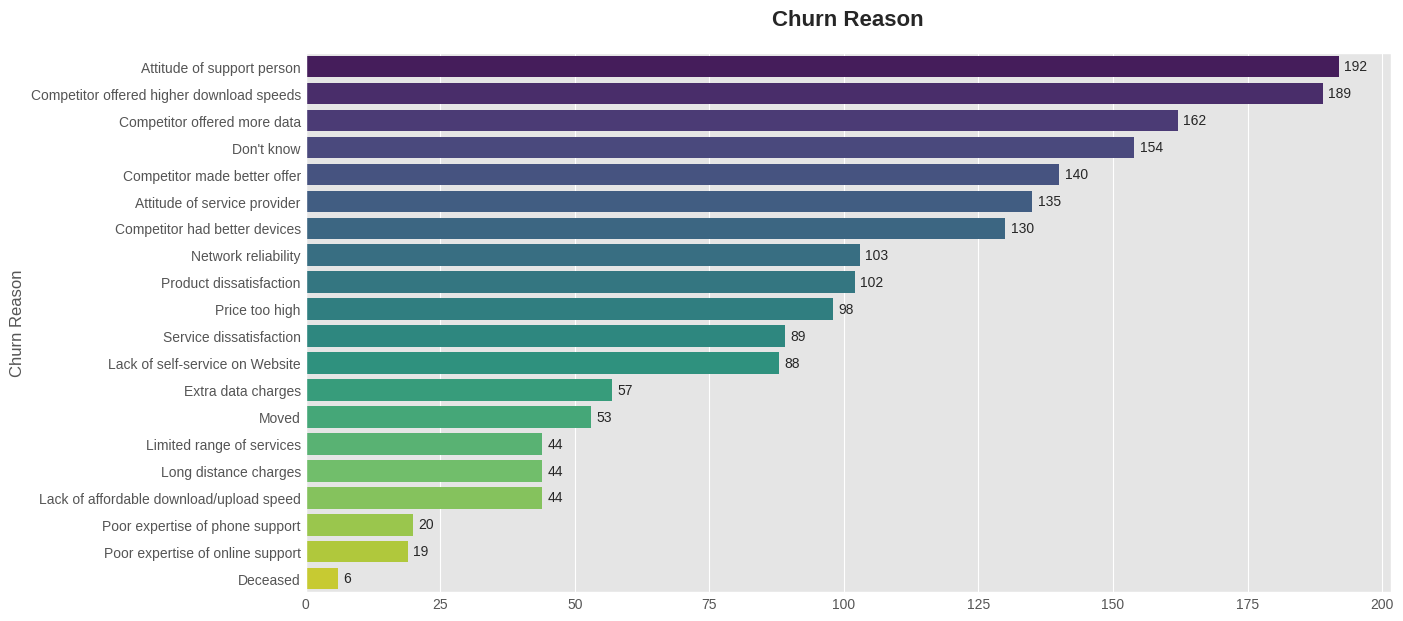

In [18]:
plt.figure(figsize=(14,7))
plt.style.use('seaborn-v0_8-pastel')
sns.barplot(y=df['Churn Reason'].value_counts().index, x=df['Churn Reason'].value_counts().values, palette='viridis')  
plt.title('Churn Reason', fontsize=16, weight='bold', pad=20)
for i, count in enumerate(df['Churn Reason'].value_counts().values):
    plt.text(count + 1, i, str(count), va='center') 
plt.show()

The majority of users churned due to poor customer service and more attractive competitor offers.

# Data Prepocessing

In [19]:
df.drop(columns=['Churn Score','Gender','Latitude', 'Longitude','Churn Reason','City','Zip Code','Lat Long','CLTV','Total Charges','Phone Service','Multiple Lines'],inplace=True)

In [20]:
binary_column = ['Senior Citizen', 'Partner', 'Dependents', 'Paperless Billing']
for col in binary_column:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

In [21]:
cols_to_modify = [
    'Online Security', 'Online Backup', 
    'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies'
]

for col in cols_to_modify:
    df[col] = df[col].replace('No internet service', 'No')

In [22]:
multicategory_column = ['Internet Service', 
                        'Online Security', 'Online Backup', 'Device Protection', 
                        'Tech Support', 'Streaming TV', 'Streaming Movies']
df = pd.get_dummies(df, columns=multicategory_column, drop_first=True)

In [23]:
additional_services_cols = [
    'Online Security_Yes', 
    'Online Backup_Yes', 
    'Device Protection_Yes',
    'Tech Support_Yes', 
    'Streaming TV_Yes', 
    'Streaming Movies_Yes'
]

df['Sum Of Additional Services'] = df[additional_services_cols].sum(axis=1)

In [24]:
bins = [0,12,100]
labels = ['New Customers','Loyal Customers']
df['Tenure Category'] = pd.cut(df['Tenure Months'], bins=bins, labels=labels, right=False)

df = pd.get_dummies(df, columns=['Tenure Category'], drop_first=True)

In [25]:
df['Monthly Charges to Tenure Ratio'] = df['Monthly Charges'] / (df['Tenure Months'] + 1)

In [26]:
df['Has No Long Term Contract'] = (df['Contract'] == 'Month-to-month').astype(int)
df = df.drop(columns=['Contract'])

In [27]:
manual_metode = ['Electronic check', 'Mailed check']
df['Is Manual Payment'] = df['Payment Method'].isin(manual_metode).astype(int)

df = df.drop(columns=['Payment Method'])

In [28]:
x = df.drop('Churn Value', axis=1)
y = df['Churn Value']

In [29]:
x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [30]:
df.head().T

,0,1,2,3,4
Senior Citizen,0,0,0,0,0
Partner,0,0,0,1,0
Dependents,0,1,1,1,1
Tenure Months,2,2,8,28,49
Paperless Billing,1,1,1,1,1
Monthly Charges,53.85,70.7,99.65,104.8,103.7
Churn Value,1,1,1,1,1
Internet Service_Fiber optic,False,True,True,True,True
Internet Service_No,False,False,False,False,False
Online Security_Yes,True,False,False,False,False


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Senior Citizen                   7043 non-null   int64  
 1   Partner                          7043 non-null   int64  
 2   Dependents                       7043 non-null   int64  
 3   Tenure Months                    7043 non-null   int64  
 4   Paperless Billing                7043 non-null   int64  
 5   Monthly Charges                  7043 non-null   float64
 6   Churn Value                      7043 non-null   int64  
 7   Internet Service_Fiber optic     7043 non-null   bool   
 8   Internet Service_No              7043 non-null   bool   
 9   Online Security_Yes              7043 non-null   bool   
 10  Online Backup_Yes                7043 non-null   bool   
 11  Device Protection_Yes            7043 non-null   bool   
 12  Tech Support_Yes    

In [32]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [33]:
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train_scaled, y_train)

In [34]:
models = [
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('AdaBoost Classifier', AdaBoostClassifier()),
    ('Gradient Boosting Classifier', GradientBoostingClassifier()),
    ('XGBClassifier', XGBClassifier()),
    ('LGBMClassifier', LGBMClassifier(verbose=-1)),
    ('CatBoostClassifier', CatBoostClassifier(verbose=False)),
    ('KNN', KNeighborsClassifier())
]

results = []
for name, model in models:
    model.fit(x_train_resampled, y_train_resampled)
    
    y_train_pred = model.predict(x_train_resampled)
    y_test_pred = model.predict(x_test_scaled)
    
    train_score = model.score(x_train_resampled, y_train_resampled)
    test_score = model.score(x_test_scaled, y_test)
    
    accuracy = accuracy_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)
    confusion = confusion_matrix(y_test, y_test_pred)
    
    results.append({
       'Model': name,
        'Accuracy': accuracy,
        'Recall': recall,
        'Precision': precision,
        'F1 Score': f1
    })

results_df = pd.DataFrame(results)
results_df_sorted = results_df.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)
display(results_df_sorted)

best_model_name = results_df_sorted.iloc[0]['Model']
best_accuracy = results_df_sorted.iloc[0]['Accuracy']

print(f"\nBest Model based on Accuracy: {best_model_name}")
print(f"Accuracy: {best_accuracy:.4f}")

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


,Model,Accuracy,Recall,Precision,F1 Score
0,Logistic Regression,0.757984,0.767380,0.530499,0.627322
1,Random Forest,0.757984,0.748663,0.531309,0.621532
2,KNN,0.726047,0.700535,0.488806,0.575824
3,Decision Tree,0.650816,0.737968,0.411940,0.528736
4,AdaBoost Classifier,0.621008,0.898396,0.403846,0.557214
5,CatBoostClassifier,0.474805,0.986631,0.334239,0.499323
6,XGBClassifier,0.391767,0.986631,0.302211,0.462696
7,LGBMClassifier,0.343506,0.989305,0.286600,0.444444
8,Gradient Boosting Classifier,0.305181,0.994652,0.275760,0.431805



Best Model based on Accuracy: Logistic Regression
Accuracy: 0.7580


In [35]:
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

lr_grid_search = GridSearchCV(
    estimator=LogisticRegression(random_state=42, max_iter=2000),
    param_grid=param_grid_lr,
    scoring='accuracy',
    cv=5,
    verbose=1,
    n_jobs=-1
)

lr_grid_search.fit(x_train_resampled, y_train_resampled)

print("\nBest parameters for Logistic Regression:", lr_grid_search.best_params_)

best_lr = lr_grid_search.best_estimator_

y_pred_lr = best_lr.predict(x_test_scaled)

print("\nTuned Logistic Regression Performance Results on Test Data:")
print(classification_report(y_test, y_pred_lr))
print(f"Accuracy Score ANN on Test Data: {accuracy_score(y_test, y_pred_lr):.4f}")

Fitting 5 folds for each of 28 candidates, totalling 140 fits

Best parameters for Logistic Regression: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}

Tuned Logistic Regression Performance Results on Test Data:
              precision    recall  f1-score   support

           0       0.90      0.75      0.82      1035
           1       0.53      0.77      0.63       374

    accuracy                           0.76      1409
   macro avg       0.72      0.76      0.72      1409
weighted avg       0.80      0.76      0.77      1409

Accuracy Score ANN on Test Data: 0.7580


# ANN

In [36]:
def build_model(hp):
    model = Sequential()
    
    input_dim = x_train_resampled.shape[1]
    model.add(Input(shape=(input_dim,)))

    hp_units_1 = hp.Int('units_1', min_value=32, max_value=128, step=32)
    model.add(Dense(units=hp_units_1, activation='relu'))

    hp_dropout_1 = hp.Float('dropout_1', min_value=0.2, max_value=0.5, step=0.1)
    model.add(Dropout(rate=hp_dropout_1))

    hp_units_2 = hp.Int('units_2', min_value=16, max_value=64, step=16)
    model.add(Dense(units=hp_units_2, activation='relu'))
    
    model.add(Dense(1, activation='sigmoid'))

    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    model.compile(
        optimizer=Adam(learning_rate=hp_learning_rate),
        loss='binary_crossentropy',
        metrics=['accuracy','recall']
    )
    
    return model

In [ ]:
tuner = kt.RandomSearch(
    build_model,
    objective=kt.Objective("val_accuracy", direction="max"),
    max_trials=20,
    executions_per_trial=1,
    directory='ann_tuning',
    project_name='churn_prediction'
)

2025-06-26 06:17:35.749316: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [38]:
early_stopping = EarlyStopping(monitor='val_accuracy', 
                              patience=10, 
                              restore_best_weights=True,
                              verbose=1)

In [39]:
tuner.search(
    x_train_resampled, 
    y_train_resampled,
    epochs=100,
    validation_split=0.2,
    callbacks=[early_stopping]
)

best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

Trial 20 Complete [00h 00m 35s]
val_accuracy: 0.8756038546562195

Best val_accuracy So Far: 0.8756038546562195
Total elapsed time: 00h 07m 01s


In [40]:
model = tuner.hypermodel.build(best_hps)

history = model.fit(
    x_train_resampled, 
    y_train_resampled,
    epochs=100,
    batch_size=32,
    validation_data=(x_test_scaled, y_test),
    callbacks=[early_stopping],
    verbose=0
)

Epoch 20: early stopping
Restoring model weights from the end of the best epoch: 10.


In [41]:
y_pred_proba = model.predict(x_test_scaled)

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


Best Threshold for Accuracy: 0.7071
Best Accuracy: 0.8006


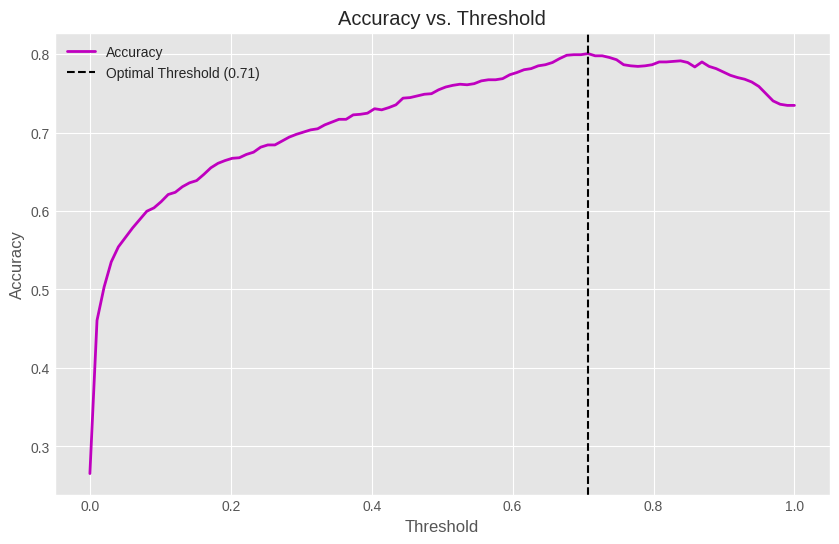

In [42]:
thresholds = np.linspace(0.0, 1.0, num=100)
accuracies = []

for thresh in thresholds:
    y_pred_thresh = (y_pred_proba >= thresh).astype(int)
    acc = accuracy_score(y_test, y_pred_thresh)
    accuracies.append(acc)

best_location = np.argmax(accuracies)
best_threshold = thresholds[best_location]
best_accuracy = accuracies[best_location]

print(f"Best Threshold for Accuracy: {best_threshold:.4f}")
print(f"Best Accuracy: {best_accuracy:.4f}")

plt.figure(figsize=(10, 6))
plt.plot(thresholds, accuracies, 'm-', label='Accuracy', linewidth=2)
plt.axvline(x=best_threshold, color='k', linestyle='--', label=f'Optimal Threshold ({best_threshold:.2f})')

plt.title('Accuracy vs. Threshold')
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [43]:
y_pred_ann = (y_pred_proba > best_threshold).astype(int)

accuracy_ann = accuracy_score(y_test, y_pred_ann)
print(f"Accuracy Score ANN on Test Data: {accuracy_ann:.4f}")

Accuracy Score ANN on Test Data: 0.8006


In [44]:
file_name = 'model.keras'

model.save(file_name)